# Общая информация

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей

# Описание данных

Таблица _**users** (информация о пользователях)_ :
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица _**calls** (информация о звонках)_ :
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица _**messages** (информация о сообщениях)_ :
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица _**internet** (информация об интернет-сессиях)_ :
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица _**tariffs** (информация о тарифах)_ :
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Содержание

[Шаг 1. Изучение общей информации о файлах с данными](#Шаг-1.-Изучение-общей-информации-о-файлах-с-данными-1)

[1.1  Выводы к первому шагу](#Выводы-к-первому-шагу)

[2  Шаг 2. Подготовка данных](#Шаг-2.-Подготовка-данных)

[2.1  Выводы ко второму шагу](#Выводы-ко-второму-шагу)

[3  Шаг 3. Анализ данных](#Шаг-3.-Анализ-данных)

[3.1  Выводы к третьему шагу](#Выводы-к-третьему-шагу-3.1)

[4  Шаг 4. Проверка гипотез](#Шаг-4.-Проверка-гипотез)

[4.1  Выводы к четвёртому шагу](#Выводы-к-четвёртому-шагу)

[5  Шаг 5. Общий вывод](#Шаг-5.-Общий-вывод)

## Шаг 1. Изучение общей информации о файлах с данными

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats as st

In [2]:
# открываем файлы
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

In [3]:
calls_data.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet_data.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages_data.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs_data.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [9]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
messages_data.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


### Выводы к первому шагу

У нас в распоряжении 5 датасетов с информацией о 500 пользователей "Мегалайна", их звонках, сообщениях и потраченом объёме интеренет-трафика. Данные "чистые", т. е. без обоснованных пропусков, но их надо привести к пригодному, для анализа формату, что и будет сделано в следующем шаге :)

## Шаг 2. Подготовка данных

In [15]:
if calls_data.isnull().sum().sum() == 0:
    print('В датафрейме calls_data пропуски отсутствуют')
else:
    print('В датафрейме calls_data есть пропуски')

if internet_data.isnull().sum().sum() == 0:
    print('В датафрейме internet_data пропуски отсутствуют')
else:
    print('В датафрейме internet_data есть пропуски')
    
if messages_data.isnull().sum().sum() == 0:
    print('В датафрейме messages_data пропуски отсутствуют')
else:
    print('В датафрейме messages_data есть пропуски')
    
if tariffs_data.isnull().sum().sum() == 0:
    print('В датафрейме tariffs_data пропуски отсутствуют')
else:
    print('В датафрейме tariffs_data есть пропуски')
    
if users_data.isnull().sum().sum() == 0:
    print('В датафрейме users_data пропуски отсутствуют')
else:
    print('В датафрейме users_data есть пропуски')

В датафрейме calls_data пропуски отсутствуют
В датафрейме internet_data пропуски отсутствуют
В датафрейме messages_data пропуски отсутствуют
В датафрейме tariffs_data пропуски отсутствуют
В датафрейме users_data есть пропуски


In [16]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [17]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format = '%Y-%m-%d')
calls_data['duration'] = np.ceil(calls_data['duration'])
calls_data['duration'] = calls_data['duration'].astype('int')

In [18]:
np.around(1.1)

1.0

In [19]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%d')
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
internet_data['mb_used'] = internet_data['mb_used'].astype('int')

In [21]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [22]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%d')

In [23]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [24]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format = '%Y-%m-%d')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format = '%Y-%m-%d')

На данном этапе значения **даты** приведены к необходимому, для дальшнейшего анализа формату. Значения **минут**, и **мегабайт** округлены в большую сторону (согласно тарификации "Мегалайна") и переведены в целочисленный тип. Пропуски в таблице _users_ в столбце с данными о дате прекращения пользования тарифом обосноваты там, что клиент ещё пользуется услугами оператора.

In [26]:
print('Число дубликатов в датасете calls:', calls_data.duplicated().sum())
print('Число дубликатов в датасете internet:', internet_data.duplicated().sum())
print('Число дубликатов в датасете messages:', messages_data.duplicated().sum())
print('Число дубликатов в датасете tariffs:', tariffs_data.duplicated().sum())
print('Число дубликатов в датасете users:', users_data.duplicated().sum())

Число дубликатов в датасете calls: 0
Число дубликатов в датасете internet: 0
Число дубликатов в датасете messages: 0
Число дубликатов в датасете tariffs: 0
Число дубликатов в датасете users: 0


Дубликаты во всех датасетах не обнаружены.

In [27]:
print('Процент нулевых значений в таблице с звонками: {:.2%}'.format((calls_data[calls_data['duration'] == 0]['duration'].count()) / len(calls_data['duration'])))

print('Процент нулевых значений в таблице с интернетом: {:.2%}'.format((internet_data[internet_data['mb_used'] == 0]['mb_used'].count()) / len(internet_data['mb_used'])))

Процент нулевых значений в таблице с звонками: 19.55%
Процент нулевых значений в таблице с интернетом: 13.12%


In [28]:
# посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month
calls_data_count = calls_data.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_data_count.columns = ['calls_count', 'calls_sum']

In [29]:
# посчитаем для каждого пользователя: количество отправленных сообщений по месяцам
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month
messages_data_count = messages_data.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
messages_data_count.columns = ['messages_sum']

In [30]:
# посчитаем для каждого пользователя: объем израсходованного интернет-трафика по месяцам
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
internet_data_count = internet_data.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
internet_data_count.columns = ['internet_sum']

In [31]:
# объединим все данные в одну таблицу
final_report = calls_data_count.merge(messages_data_count, how = 'outer', on = ['user_id', 'month']).merge(internet_data_count, how = 'outer', on = ['user_id', 'month'])
tariff_name = users_data[['user_id', 'tariff']]
final_report = final_report.reset_index().merge(tariff_name, on = ['user_id'], how = 'left')

In [32]:
final_report.head(10)

,user_id,month,calls_count,calls_sum,messages_sum,internet_sum,tariff
0,1000,5,22.0,159.0,22.0,2256.0,ultra
1,1000,6,43.0,172.0,60.0,23257.0,ultra
2,1000,7,47.0,340.0,75.0,14016.0,ultra
3,1000,8,52.0,408.0,81.0,14070.0,ultra
4,1000,9,58.0,466.0,57.0,14581.0,ultra
5,1000,10,57.0,350.0,73.0,14717.0,ultra
6,1000,11,43.0,338.0,58.0,14768.0,ultra
7,1000,12,46.0,333.0,70.0,9827.0,ultra
8,1001,11,59.0,430.0,NaN,18452.0,smart
9,1001,12,63.0,414.0,NaN,14053.0,smart


In [33]:
# проверим новую таблицу на пропуски
final_report.isnull().sum()

user_id           0
month             0
calls_count      40
calls_sum        40
messages_sum    497
internet_sum     11
tariff            0
dtype: int64

In [34]:
final_report['calls_count'] = final_report['calls_count'].fillna(0)
final_report['calls_sum'] = final_report['calls_sum'].fillna(0)
final_report['messages_sum'] = final_report['messages_sum'].fillna(0)
final_report['internet_sum'] = final_report['internet_sum'].fillna(0)

В рещультате новых преобразований появились пропуски, но они не страшны, т. к. предполагаем что пропуски в тем местах, где клиент не польовался определённой услугой (например не разу за месяц не отправил сообщение), поэтому их заменяем **0**.

In [35]:
def monthly_revenue (row):
    
    calls = row['calls_sum']
    messages = row['messages_sum']
    internet = row['internet_sum']
    tariff = row['tariff']
    
    minute_limit = tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'minutes_included'].array[0]
    messages_limit = tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'messages_included'].array[0]
    internet_limit = tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'mb_per_month_included'].array[0]
    
    # переплата за звонки
    if (minute_limit - calls) < 0:
        calls_overpayment = np.abs(calls - minute_limit) * tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'rub_per_minute'].array[0]
    else: 
        calls_overpayment = 0
    
    # переплата за сообщения
    if (messages_limit - messages) < 0:
        messages_overpayment = np.abs(messages_limit - messages) * tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'rub_per_message'].array[0]
    else: 
        messages_overpayment = 0
    
    # переплата за интерет
    if (internet_limit - internet) < 0:
        internet_overpayment = (np.abs(internet_limit - internet)/1024) * tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'rub_per_gb'].array[0]
    else: 
        internet_overpayment = 0
    
    # абонентская плата
    subscription_fee = tariffs_data.loc[tariffs_data['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]
    return (calls_overpayment + messages_overpayment + internet_overpayment + subscription_fee)

In [36]:
final_report['monthly_revenue'] = final_report.apply(monthly_revenue, axis=1).astype('int')

In [37]:
final_report.head(10)

,user_id,month,calls_count,calls_sum,messages_sum,internet_sum,tariff,monthly_revenue
0,1000,5,22.0,159.0,22.0,2256.0,ultra,1950
1,1000,6,43.0,172.0,60.0,23257.0,ultra,1950
2,1000,7,47.0,340.0,75.0,14016.0,ultra,1950
3,1000,8,52.0,408.0,81.0,14070.0,ultra,1950
4,1000,9,58.0,466.0,57.0,14581.0,ultra,1950
5,1000,10,57.0,350.0,73.0,14717.0,ultra,1950
6,1000,11,43.0,338.0,58.0,14768.0,ultra,1950
7,1000,12,46.0,333.0,70.0,9827.0,ultra,1950
8,1001,11,59.0,430.0,0.0,18452.0,smart,1153
9,1001,12,63.0,414.0,0.0,14053.0,smart,550


### Выводы ко второму шагу

В данном пункте были изменены типы данных, гже этого требовалось (**дата** приведена к формату Datetime, **минуты** и **мегабайты** округдены в большую сторону и переведены в целочисленный тип, согласно тарификации "Мегалайна"). Пропуски в новой таблие с данными по пользователям за месяц заменены на 0, рассчитаны все необходимые показамели (суммарное количество звонков, их продолжительность, суммарное чисо сообщений и суммарное колличество потраеных мегабайт за месяц по каждому пользователя, а также помесячная выручка компании с каждого пользователя).

## Шаг 3. Анализ данных


In [38]:
calls_ultra = final_report.pivot_table(index = ['tariff', 'month'], values = 'calls_sum', aggfunc = 'sum').query('tariff == "ultra"')
calls_smart = final_report.pivot_table(index = ['tariff', 'month'], values = 'calls_sum', aggfunc = 'sum').query('tariff == "smart"')

messages_ultra = final_report.pivot_table(index = ['tariff', 'month'], values = 'messages_sum', aggfunc = 'sum').query('tariff == "ultra"')
messages_smart = final_report.pivot_table(index = ['tariff', 'month'], values = 'messages_sum', aggfunc = 'sum').query('tariff == "smart"')

internet_ultra = final_report.pivot_table(index = ['tariff', 'month'], values = 'internet_sum', aggfunc = 'sum').query('tariff == "ultra"')
internet_smart = final_report.pivot_table(index = ['tariff', 'month'], values = 'internet_sum', aggfunc = 'sum').query('tariff == "smart"')

monthly_revenue_smart = final_report.pivot_table(index = ['tariff', 'month'], values = 'monthly_revenue', aggfunc = 'sum').query('tariff == "smart"')
monthly_revenue_ultra = final_report.pivot_table(index = ['tariff', 'month'], values = 'monthly_revenue', aggfunc = 'sum').query('tariff == "ultra"')

In [39]:
tariff_for = ['ultra', 'smart']
month_for = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for tarif in tariff_for:
    for mot in month_for:
        temp = final_report.query('(tariff == @tarif) and (month == @mot)')
        mean_calls = temp['calls_sum'].mean()
        variance_calls = np.var(temp['calls_sum'], ddof = 1)
        standard_calls = np.std(temp['calls_sum'], ddof = 1)

        print('Среднее значение звонков тарифа ', tarif, ' за', mot, 'месяц: {:.2f}'.format(mean_calls))
        print('Дисперсия звонков тарифа', tarif, ' за', mot, 'месяц: {:.2f}'.format(variance_calls))
        print('Стандартное отклонение звонков тарифа ', tarif, 'за', mot, 'месяц: {:.2f}'.format(standard_calls))
        print()    

Среднее значение звонков тарифа  ultra  за 1 месяц: 428.11
Дисперсия звонков тарифа ultra  за 1 месяц: 72769.36
Стандартное отклонение звонков тарифа  ultra за 1 месяц: 269.76

Среднее значение звонков тарифа  ultra  за 2 месяц: 297.12
Дисперсия звонков тарифа ultra  за 2 месяц: 87919.68
Стандартное отклонение звонков тарифа  ultra за 2 месяц: 296.51

Среднее значение звонков тарифа  ultra  за 3 месяц: 489.65
Дисперсия звонков тарифа ultra  за 3 месяц: 111384.90
Стандартное отклонение звонков тарифа  ultra за 3 месяц: 333.74

Среднее значение звонков тарифа  ultra  за 4 месяц: 458.02
Дисперсия звонков тарифа ultra  за 4 месяц: 71653.87
Стандартное отклонение звонков тарифа  ultra за 4 месяц: 267.68

Среднее значение звонков тарифа  ultra  за 5 месяц: 510.33
Дисперсия звонков тарифа ultra  за 5 месяц: 83870.19
Стандартное отклонение звонков тарифа  ultra за 5 месяц: 289.60

Среднее значение звонков тарифа  ultra  за 6 месяц: 479.70
Дисперсия звонков тарифа ultra  за 6 месяц: 91535.95
Ст

In [40]:
for tarif in tariff_for:
    for mot in month_for:
        temp = final_report.query('(tariff == @tarif) and (month == @mot)')
        mean_messages = temp['messages_sum'].mean()
        variance_messages = np.var(temp['messages_sum'], ddof = 1)
        standard_messages = np.std(temp['messages_sum'], ddof = 1)

        print('Среднее значение сообщений тарифа ', tarif, ' за', mot, 'месяц: {:.2f}'.format(mean_messages))
        print('Дисперсия сообщений тарифа', tarif, ' за', mot, 'месяц: {:.2f}'.format(variance_messages))
        print('Стандартное отклонение сообщений тарифа ', tarif, 'за', mot, 'месяц: {:.2f}'.format(standard_messages))
        print()

Среднее значение сообщений тарифа  ultra  за 1 месяц: 33.78
Дисперсия сообщений тарифа ultra  за 1 месяц: 940.69
Стандартное отклонение сообщений тарифа  ultra за 1 месяц: 30.67

Среднее значение сообщений тарифа  ultra  за 2 месяц: 21.96
Дисперсия сообщений тарифа ultra  за 2 месяц: 716.82
Стандартное отклонение сообщений тарифа  ultra за 2 месяц: 26.77

Среднее значение сообщений тарифа  ultra  за 3 месяц: 32.30
Дисперсия сообщений тарифа ultra  за 3 месяц: 1732.38
Стандартное отклонение сообщений тарифа  ultra за 3 месяц: 41.62

Среднее значение сообщений тарифа  ultra  за 4 месяц: 31.56
Дисперсия сообщений тарифа ultra  за 4 месяц: 1407.29
Стандартное отклонение сообщений тарифа  ultra за 4 месяц: 37.51

Среднее значение сообщений тарифа  ultra  за 5 месяц: 37.85
Дисперсия сообщений тарифа ultra  за 5 месяц: 1624.64
Стандартное отклонение сообщений тарифа  ultra за 5 месяц: 40.31

Среднее значение сообщений тарифа  ultra  за 6 месяц: 41.73
Дисперсия сообщений тарифа ultra  за 6 мес

In [41]:
for tarif in tariff_for:
    for mot in month_for:
        temp = final_report.query('(tariff == @tarif) and (month == @mot)')
        mean_internet = temp['internet_sum'].mean()
        variance_internet = np.var(temp['internet_sum'], ddof = 1)
        standard_internet = np.std(temp['internet_sum'], ddof = 1)

        print('Среднее значение потраченого интернет-трафика тарифа ', tarif, ' за', mot, 'месяц: {:.2f}'.format(mean_internet))
        print('Дисперсия потраченого интернет-трафика тарифа', tarif, ' за', mot, 'месяц: {:.2f}'.format(variance_internet))
        print('Стандартное отклонение потраченого интернет-трафика тарифа ', tarif, 'за', mot, 'месяц: {:.2f}'.format(standard_internet))
        print()

Среднее значение потраченого интернет-трафика тарифа  ultra  за 1 месяц: 13153.56
Дисперсия потраченого интернет-трафика тарифа ultra  за 1 месяц: 47226405.03
Стандартное отклонение потраченого интернет-трафика тарифа  ultra за 1 месяц: 6872.15

Среднее значение потраченого интернет-трафика тарифа  ultra  за 2 месяц: 11786.96
Дисперсия потраченого интернет-трафика тарифа ultra  за 2 месяц: 113515032.13
Стандартное отклонение потраченого интернет-трафика тарифа  ultra за 2 месяц: 10654.34

Среднее значение потраченого интернет-трафика тарифа  ultra  за 3 месяц: 17551.97
Дисперсия потраченого интернет-трафика тарифа ultra  за 3 месяц: 120164047.80
Стандартное отклонение потраченого интернет-трафика тарифа  ultra за 3 месяц: 10961.94

Среднее значение потраченого интернет-трафика тарифа  ultra  за 4 месяц: 16843.80
Дисперсия потраченого интернет-трафика тарифа ultra  за 4 месяц: 94623931.42
Стандартное отклонение потраченого интернет-трафика тарифа  ultra за 4 месяц: 9727.48

Среднее знач

In [42]:
final_report_ultra = final_report.query('tariff == "ultra"')
final_report_smart = final_report.query('tariff == "smart"')

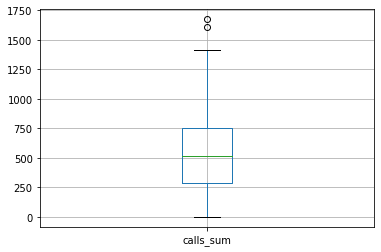

In [43]:
final_report_ultra.boxplot(column = 'calls_sum')
plt.show()

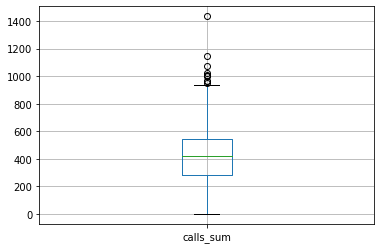

In [44]:
final_report_smart.boxplot(column = 'calls_sum')
plt.show()

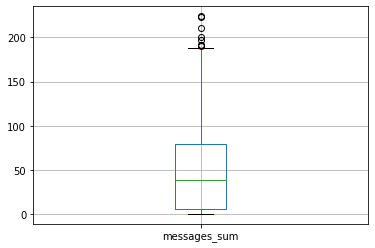

In [45]:
final_report_ultra.boxplot(column = 'messages_sum')
plt.show()

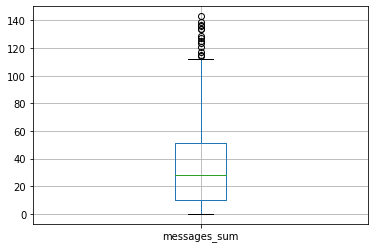

In [46]:
final_report_smart.boxplot(column = 'messages_sum')
plt.show()

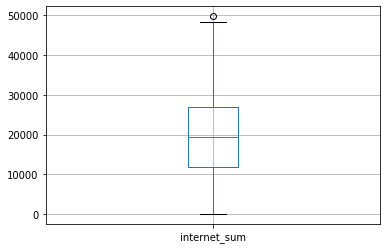

In [47]:
final_report_ultra.boxplot(column = 'internet_sum')
plt.show()

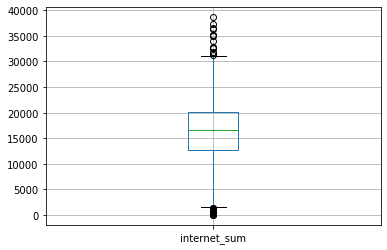

In [48]:
final_report_smart.boxplot(column = 'internet_sum')
plt.show()

Text(0, 0.5, 'Частота')

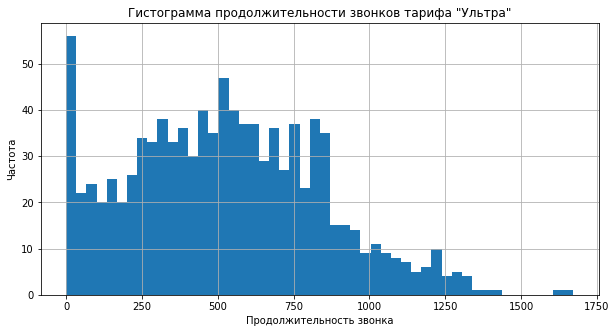

In [49]:
final_report_ultra['calls_sum'].hist(bins = 50, grid = True, figsize=(10,5))
plt.title('Гистограмма продолжительности звонков тарифа "Ультра"')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Частота')

Большая часть продолжительности звонков лежит в диапазоне до 900 минут.

В тариф включено 3000 минут, пользователи не выходят за пределы лимита.

Text(0, 0.5, 'Частота')

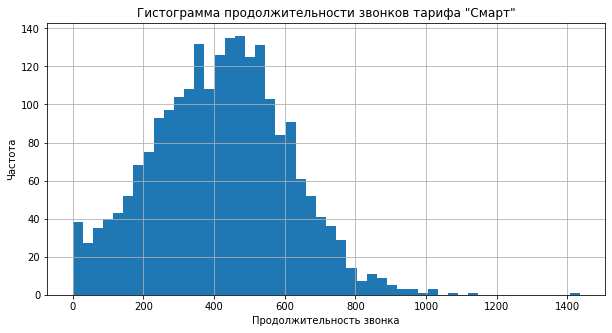

In [50]:
final_report_smart['calls_sum'].hist(bins = 50, grid = True, figsize=(10,5))
plt.title('Гистограмма продолжительности звонков тарифа "Смарт"')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Частота')

Большая часть продолжительности звонков лежит в диапазоне 200 - 600 минут.

В тариф включено 500 минут, большАя часть пользоватей вышла за пределы лимита.

Text(0, 0.5, 'Частота')

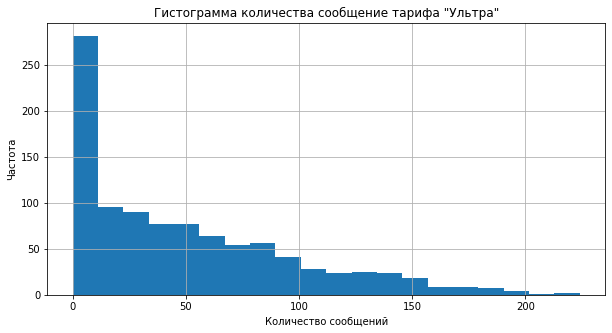

In [51]:
final_report_ultra['messages_sum'].hist(bins = 20, grid = True, figsize=(10,5))
plt.title('Гистограмма количества сообщение тарифа "Ультра"')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')

Большая часть количества сообщений лежит в диапазоне до 100 шт.

В тариф включено 1000 сообщений, пользователи не выходят за пределы лимита.

Text(0, 0.5, 'Частота')

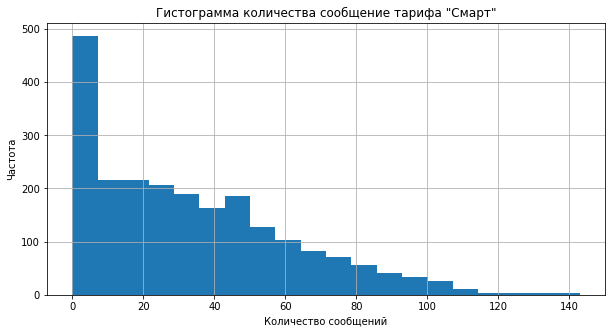

In [52]:
final_report_smart['messages_sum'].hist(bins = 20, grid = True, figsize=(10,5))
plt.title('Гистограмма количества сообщение тарифа "Смарт"')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')

Большая часть количества сообщений лежит в диапазоне до 50 шт.

В тариф включено 50 сообщений, есть пользователи, которые вышли за пределы лимита, но их относительно не много.

Text(0, 0.5, 'Частота')

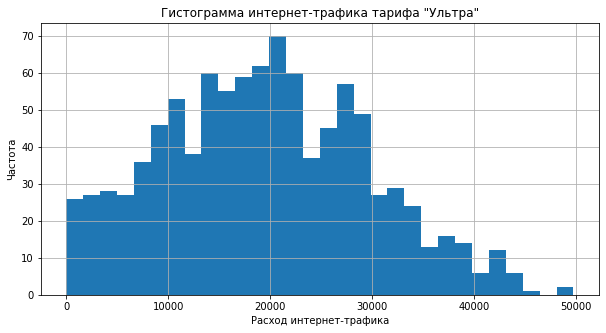

In [53]:
final_report_ultra['internet_sum'].hist(bins = 30, grid = True, figsize=(10,5))
plt.title('Гистограмма интернет-трафика тарифа "Ультра"')
plt.xlabel('Расход интернет-трафика')
plt.ylabel('Частота')

Большая часть потраченного интернет-трафика лежит в диапазоне 10 000 - 30 000 мб.

В тариф включено 30 Гб, есть пользователи, которые вышли за пределы лимита, но их относительно не много.

Text(0, 0.5, 'Частота')

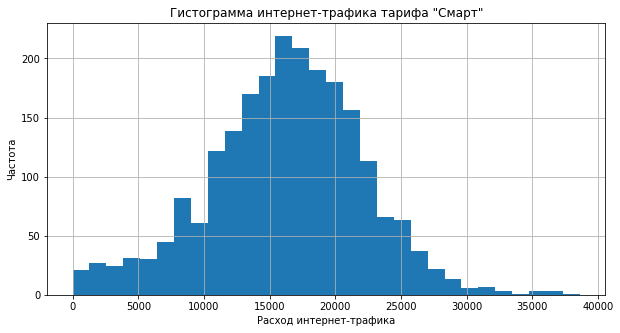

In [54]:
final_report_smart['internet_sum'].hist(bins = 30, grid = True, figsize=(10,5))
plt.title('Гистограмма интернет-трафика тарифа "Смарт"')
plt.xlabel('Расход интернет-трафика')
plt.ylabel('Частота')

Большая часть потраченного интернет-трафика лежит в диапазоне 10 000 - 22 500 мб.

В тариф включено 15 Гб, большинство пользователей вышли за пределы лимита.

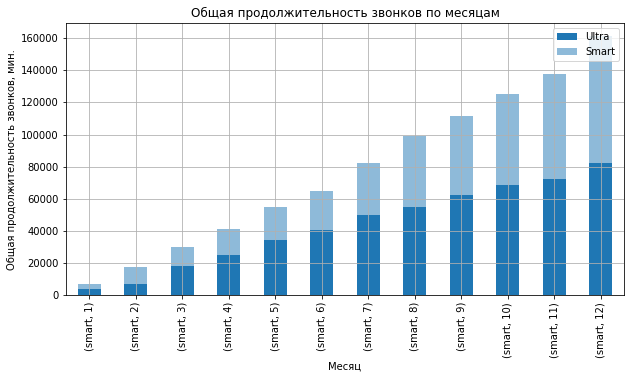

In [55]:
ax1 = calls_ultra['calls_sum'].plot(kind = 'bar', alpha = 1, grid = True, label = 'Ultra', figsize=(10,5))
ax2 = calls_smart['calls_sum'].plot(kind = 'bar', alpha = 0.5, grid = True, label = 'Smart', figsize=(10,5))

ax1.set_title('Общая продолжительность звонков по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Общая продолжительность звонков, мин.')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.show()

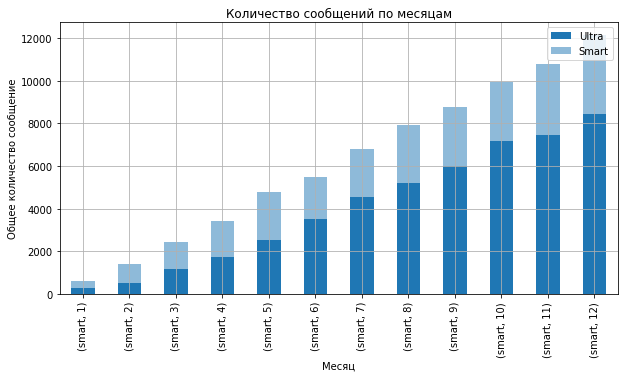

In [56]:
ax1 = messages_ultra['messages_sum'].plot(kind = 'bar', alpha = 1, grid = True, label = 'Ultra', figsize=(10,5))
ax2 = messages_smart['messages_sum'].plot(kind = 'bar', alpha = 0.5, grid = True, label = 'Smart', figsize=(10,5))

ax1.set_title('Количество сообщений по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Общее количество сообщение')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.show()

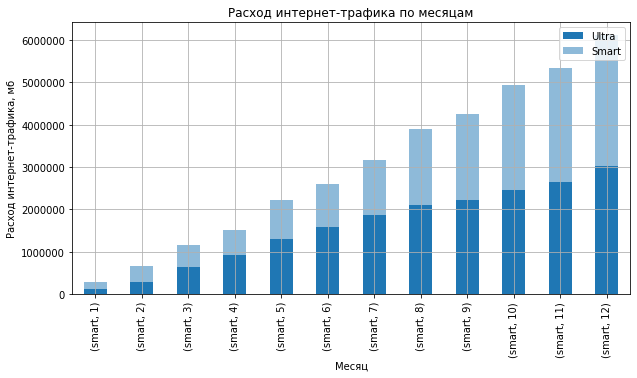

In [57]:
ax1 = internet_ultra['internet_sum'].plot(kind = 'bar', alpha = 1, grid = True, label = 'Ultra', figsize=(10,5))
ax2 = internet_smart['internet_sum'].plot(kind = 'bar', alpha = 0.5, grid = True, label = 'Smart', figsize=(10,5))

ax1.set_title('Расход интернет-трафика по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Расход интернет-трафика, мб')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.show()

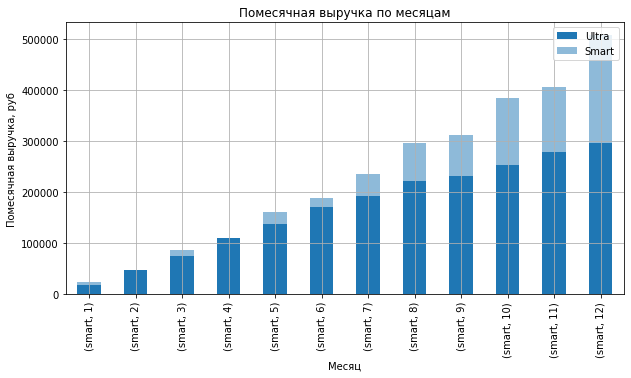

In [58]:
ax1 = monthly_revenue_ultra['monthly_revenue'].plot(kind = 'bar', alpha = 1, grid = True, label = 'Ultra', figsize=(10,5))
ax2 = monthly_revenue_smart['monthly_revenue'].plot(kind = 'bar', alpha = 0.5, grid = True, label = 'Smart', figsize=(10,5))

ax1.set_title('Помесячная выручка по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Помесячная выручка, руб')

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.show()

Из графиков звонков / сообщений / потраченного-интернет трафика / помесячной выручки хорошо видно что компания "Мегалайн" активно развивается. Тендения роста с большего одинаковая, между выбранными характеристиками.

### Выводы к третьему шагу

Соглано полученным данным сделаем следующие выводы:
* наиболее распространённый диапазон потраченных минут за месяц тарифа "Ультра" находится в диапазоне 200 - 800 минут
* наиболее распространённый диапазон потраченных минут за месяц тарифа "Смарт" находится в диапазоне 200 - 600 минут
* наиболее распространённый диапазон потраченных сообщений за месяц тарифа "Ультра" находится в диапазоне до 100 шт.
* наиболее распространённый диапазон потраченных сообщений за месяц тарифа "Смарт" находится в диапазоне до 50 шт.
* наиболее распространённый диапазон потраченного интернет-трафика за месяц тарифа "Ультра" находится в диапазоне 10.000 - 30.000 мб
* наиболее распространённый диапазон потраченного интернет-трафика за месяц тарифа "Смарт" находится в диапазоне 10.000 - 22.500 мб
* из графиков количество звонков/сообщений/потраченного интернет-трафика по месяцам, видно что компания развивается

Распределение у графиков нормальное, местами с положительной скошенностью

## Шаг 4. Проверка гипотез

Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается

H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [59]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(final_report_ultra['monthly_revenue'], final_report_smart['monthly_revenue'], equal_var = False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.133013116078655e-296
Отвергаем нулевую гипотезу


In [60]:
final_report_ultra['monthly_revenue'].sum()

2029556

In [61]:
final_report_smart['monthly_revenue'].sum()

2748486

In [62]:
city_name = users_data[['user_id', 'city']]
final_report_city = final_report.reset_index().merge(city_name, on = ['user_id'], how = 'left')

final_report_city_moscow = final_report_city.query('city == "Москва"')
final_report_city_other = final_report_city.query('city != "Москва"')

Гипотеза о том, средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [63]:
# критический уровень статистической значимости
alpha = .05

results = st.ttest_ind(final_report_city_moscow['monthly_revenue'], final_report_city_other['monthly_revenue'], equal_var = False)

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4546446281204245
Не получилось отвергнуть нулевую гипотезу


### Выводы к четвёртому шагу

Выдвинуты следующие гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 * H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается
 * H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
 * H0: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов
 * H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
 
Гипотеза Н1 дана из условия, соответственно гипотеза Н0 противоположенна по смыслу.
Параметр _equal_var_ был использован со значением _False_ , т. к. дисперсии двух выборок отличаются друг от друга.

Исходя из проверки гепотив делаем **выводы**:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» **различается**
 * средняя выручка пользователей из Москвы **НЕ** отличается от выручки пользователей из других регионов